In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify drive contents
!ls /content/drive/MyDrive/

Mounted at /content/drive
 cleaned_dataset.zip	 'Job Applications.gsheet'	   Surya_Suresh_Resume.gdoc
'Colab Notebooks'	 'LeetCode Practice.gsheet'
'How To Get A Job.gdoc'   Surya_Suresh_Cover_Letter.gdoc


In [2]:
!unzip "/content/drive/MyDrive/cleaned_dataset.zip" -d "/content/"

Archive:  /content/drive/MyDrive/cleaned_dataset.zip
   creating: /content/avulsion_fracture/
   creating: /content/comminuted_fracture/
   creating: /content/fracture_dislocation/
   creating: /content/greenstick_fracture/
   creating: /content/hairline_fracture/
   creating: /content/impacted_fracture/
   creating: /content/longitudinal_fracture/
   creating: /content/oblique_fracture/
   creating: /content/pathological_fracture/
   creating: /content/spiral_fracture/
   creating: /content/longitudinal_fracture/test/
   creating: /content/longitudinal_fracture/train/
  inflating: /content/longitudinal_fracture/test/300px-Medical_X-Ray_imaging_NJR06_Nevit_nasal_bone_fracture_jpg.rf.f482a70f53e8ceac96b6ee215badf095.jpg  
  inflating: /content/longitudinal_fracture/test/21a4e1e58df56b97092f93d8c1c230_jumbo_jpeg.rf.fa12dc139f2460747c7aab3231101fc1.jpg  
  inflating: /content/longitudinal_fracture/test/1-s2-0-S235204771630003X-gr2_jpg.rf.23497906a4b6a3106d193648e244cc6e.jpg  
  inflating:

In [6]:
import os
import shutil

# Define source directory and target directory
source_dir = "/content"
target_dir = "/content/cleaned_dataset"

# Ensure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Get all class folders (excluding unwanted ones)
class_folders = [f for f in os.listdir(source_dir)
                 if os.path.isdir(os.path.join(source_dir, f))
                 and f not in ["drive", "sample_data", "cleaned_dataset", ".config"]]

# Move each class folder into cleaned_dataset
for folder in class_folders:
    src = os.path.join(source_dir, folder)
    dst = os.path.join(target_dir, folder)
    print(f"📂 Moving {folder} → {dst}")
    shutil.move(src, dst)

print("✅ All class folders moved into cleaned_dataset successfully!")


📂 Moving hairline_fracture → /content/cleaned_dataset/hairline_fracture
📂 Moving comminuted_fracture → /content/cleaned_dataset/comminuted_fracture
📂 Moving impacted_fracture → /content/cleaned_dataset/impacted_fracture
📂 Moving spiral_fracture → /content/cleaned_dataset/spiral_fracture
📂 Moving fracture_dislocation → /content/cleaned_dataset/fracture_dislocation
📂 Moving greenstick_fracture → /content/cleaned_dataset/greenstick_fracture
📂 Moving oblique_fracture → /content/cleaned_dataset/oblique_fracture
📂 Moving avulsion_fracture → /content/cleaned_dataset/avulsion_fracture
📂 Moving pathological_fracture → /content/cleaned_dataset/pathological_fracture
📂 Moving longitudinal_fracture → /content/cleaned_dataset/longitudinal_fracture
✅ All class folders moved into cleaned_dataset successfully!


In [7]:
!ls cleaned_dataset/

avulsion_fracture     greenstick_fracture  longitudinal_fracture  spiral_fracture
comminuted_fracture   hairline_fracture    oblique_fracture
fracture_dislocation  impacted_fracture    pathological_fracture


In [8]:
from PIL import Image
import os

dataset_path = "cleaned_dataset"
bad_images = []

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Will raise an error if corrupt
                except:
                    bad_images.append(img_path)

if bad_images:
    print(f"⚠️ Found {len(bad_images)} corrupt images!")
    for bad_img in bad_images[:10]:  # Show only first 10
        print(bad_img)
else:
    print("✅ No corrupt images found!")


✅ No corrupt images found!


In [9]:
from collections import Counter

image_sizes = Counter()
for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                try:
                    with Image.open(img_path) as img:
                        image_sizes[img.size] += 1
                except:
                    pass

print("\n📊 Unique Image Sizes in Dataset:")
for size, count in image_sizes.most_common():
    print(f"{size}: {count} images")



📊 Unique Image Sizes in Dataset:
(640, 640): 1560 images


In [10]:
from collections import defaultdict

class_counts = defaultdict(int)
for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            class_counts[fracture_type] += len(os.listdir(folder))

print("\n📊 Class Distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")



📊 Class Distribution:
hairline_fracture: 156 images
comminuted_fracture: 156 images
impacted_fracture: 156 images
spiral_fracture: 156 images
fracture_dislocation: 156 images
greenstick_fracture: 156 images
oblique_fracture: 156 images
avulsion_fracture: 156 images
pathological_fracture: 156 images
longitudinal_fracture: 156 images


In [11]:
import os

dataset_path = "/content/cleaned_dataset"
if not os.path.exists(dataset_path):
    print("🚨 Dataset not found! Please upload and unzip `cleaned_dataset.zip`.")
else:
    print("✅ Dataset is present and ready!")
    print("📂 Checking contents:")
    !ls cleaned_dataset


✅ Dataset is present and ready!
📂 Checking contents:
avulsion_fracture     greenstick_fracture  longitudinal_fracture  spiral_fracture
comminuted_fracture   hairline_fracture    oblique_fracture
fracture_dislocation  impacted_fracture    pathological_fracture


In [12]:
import os
import shutil

# ✅ Define Paths
dataset_path = "/content/cleaned_dataset"  # Current dataset location
new_dataset_path = "/content/updated_dataset"  # New organized dataset

# ✅ Define Class Mapping (10 → 7 Classes)
class_mapping = {
    "avulsion_fracture": "avulsion_fracture",
    "comminuted_fracture": "comminuted_fracture",
    "fracture_dislocation": "fracture_dislocation",
    "spiral_fracture": "curved_fractures", "oblique_fracture": "curved_fractures",
    "greenstick_fracture": "linear_fractures", "longitudinal_fracture": "linear_fractures",
    "pathological_fracture": "internal_fractures", "impacted_fracture": "internal_fractures",
    "hairline_fracture": "hairline_fracture"
}

# ✅ Ensure New Directories Exist (for train & test)
for mode in ["train", "test"]:
    for new_class in set(class_mapping.values()):  # Unique new categories
        os.makedirs(os.path.join(new_dataset_path, mode, new_class), exist_ok=True)

# ✅ Move Images to New Folders
for old_class in os.listdir(dataset_path):  # Iterate over the 10 old class folders
    old_class_path = os.path.join(dataset_path, old_class)

    if old_class in class_mapping:  # Ensure class exists in our mapping
        new_class_name = class_mapping[old_class]

        for mode in ["train", "test"]:
            old_mode_path = os.path.join(old_class_path, mode)  # e.g., cleaned_dataset/avulsion_fracture/train

            if os.path.exists(old_mode_path):  # Ensure train/test exists inside each old class
                for img_file in os.listdir(old_mode_path):
                    src = os.path.join(old_mode_path, img_file)
                    dst = os.path.join(new_dataset_path, mode, new_class_name, img_file)

                    shutil.move(src, dst)

                print(f"✅ Moved {old_class} ({mode}) → {new_class_name}")

print("\n🚀 Dataset Reorganization Complete! ✅")


✅ Moved hairline_fracture (train) → hairline_fracture
✅ Moved hairline_fracture (test) → hairline_fracture
✅ Moved comminuted_fracture (train) → comminuted_fracture
✅ Moved comminuted_fracture (test) → comminuted_fracture
✅ Moved impacted_fracture (train) → internal_fractures
✅ Moved impacted_fracture (test) → internal_fractures
✅ Moved spiral_fracture (train) → curved_fractures
✅ Moved spiral_fracture (test) → curved_fractures
✅ Moved fracture_dislocation (train) → fracture_dislocation
✅ Moved fracture_dislocation (test) → fracture_dislocation
✅ Moved greenstick_fracture (train) → linear_fractures
✅ Moved greenstick_fracture (test) → linear_fractures
✅ Moved oblique_fracture (train) → curved_fractures
✅ Moved oblique_fracture (test) → curved_fractures
✅ Moved avulsion_fracture (train) → avulsion_fracture
✅ Moved avulsion_fracture (test) → avulsion_fracture
✅ Moved pathological_fracture (train) → internal_fractures
✅ Moved pathological_fracture (test) → internal_fractures
✅ Moved longi

In [ ]:
# ✅ Install missing dependencies
!pip install torch torchvision tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [83]:
import os
import hashlib
from collections import defaultdict
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Define dataset path
updated_dataset_path = "/content/updated_dataset"  # Adjust if needed

# Initialize counters
class_counts = defaultdict(lambda: {'train': 0, 'test': 0})

# Verify dataset structure and check for duplicates
train_images = set()
test_images = set()

def get_file_hash(file_path):
    """Generate hash for an image file to detect duplicates."""
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        hasher.update(f.read())
    return hasher.hexdigest()

for mode in ["train", "test"]:
    mode_path = os.path.join(updated_dataset_path, mode)
    if os.path.exists(mode_path):
        for class_name in os.listdir(mode_path):
            class_folder = os.path.join(mode_path, class_name)
            if os.path.isdir(class_folder):
                image_files = os.listdir(class_folder)
                class_counts[class_name][mode] = len(image_files)

                for img_name in image_files:
                    img_path = os.path.join(class_folder, img_name)
                    img_hash = get_file_hash(img_path)

                    if mode == "train":
                        train_images.add(img_hash)
                    elif mode == "test":
                        test_images.add(img_hash)

# Convert to DataFrame for better visualization
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index')
class_counts_df["Total"] = class_counts_df["train"] + class_counts_df["test"]

# Display results
from IPython.display import display
print("\n📊 Final Class Distribution After Merging:\n")
display(class_counts_df)

# Calculate class weights dynamically
class_weights = torch.tensor([1.0 / (count + 1) for count in class_counts_df["Total"]], dtype=torch.float32)
print("\n📊 Calculated Class Weights:", class_weights)

# Grad-CAM Implementation to Visualize Model Attention
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

def apply_gradcam(model, img_tensor, target_layer):
    feature_maps = None
    gradients = None

    def forward_hook(module, input, output):
        nonlocal feature_maps
        feature_maps = output

    def backward_hook(module, grad_in, grad_out):
        nonlocal gradients
        gradients = grad_out[0]

    target_layer.register_forward_hook(forward_hook)
    target_layer.register_backward_hook(backward_hook)

    output = model(img_tensor)
    pred_class = output.argmax().item()
    output[:, pred_class].backward()

    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    for i in range(feature_maps.shape[1]):
        feature_maps[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(feature_maps, dim=1).squeeze().detach().numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

def overlay_heatmap(img_path, heatmap):
    image = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original X-ray")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Heatmap")
    plt.show()




📊 Final Class Distribution After Merging:



,train,test,Total
hairline_fracture,146,10,156
comminuted_fracture,142,14,156
linear_fractures,284,28,312
fracture_dislocation,137,19,156
curved_fractures,283,28,311
internal_fractures,285,27,312
avulsion_fracture,142,14,156



📊 Calculated Class Weights: tensor([0.0064, 0.0064, 0.0032, 0.0064, 0.0032, 0.0032, 0.0064])


In [23]:
# ✅ Verify CUDA & GPU details
import torch
print(f"🚀 Using device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

# ✅ Check if GPU is available
if torch.cuda.is_available():
    !nvidia-smi
else:
    print("🚨 No GPU detected! Set Runtime to GPU in Colab.")


🚀 Using device: cuda
Thu Feb 13 16:24:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   46C    P8             16W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+--------------------------

In [30]:
# ✅ Debug: Print Parameter Devices
for name, param in model.named_parameters():
    print(f"{name}: {param.device}")


features.0.0.weight: cpu
features.0.1.weight: cpu
features.0.1.bias: cpu
features.1.conv.0.0.weight: cpu
features.1.conv.0.1.weight: cpu
features.1.conv.0.1.bias: cpu
features.1.conv.1.weight: cpu
features.1.conv.2.weight: cpu
features.1.conv.2.bias: cpu
features.2.conv.0.0.weight: cpu
features.2.conv.0.1.weight: cpu
features.2.conv.0.1.bias: cpu
features.2.conv.1.0.weight: cpu
features.2.conv.1.1.weight: cpu
features.2.conv.1.1.bias: cpu
features.2.conv.2.weight: cpu
features.2.conv.3.weight: cpu
features.2.conv.3.bias: cpu
features.3.conv.0.0.weight: cpu
features.3.conv.0.1.weight: cpu
features.3.conv.0.1.bias: cpu
features.3.conv.1.0.weight: cpu
features.3.conv.1.1.weight: cpu
features.3.conv.1.1.bias: cpu
features.3.conv.2.weight: cpu
features.3.conv.3.weight: cpu
features.3.conv.3.bias: cpu
features.4.conv.0.0.weight: cpu
features.4.conv.0.1.weight: cpu
features.4.conv.0.1.bias: cpu
features.4.conv.1.0.weight: cpu
features.4.conv.1.1.weight: cpu
features.4.conv.1.1.bias: cpu
featu

In [44]:
### **Setup & Imports**
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms.v2 as v2_transforms
from PIL import Image
from tqdm import tqdm
import numpy as np

# ✅ Set device & optimizations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

🚀 Using device: cuda


In [45]:
### **Define Dataset Class**
class FractureDataset(Dataset):
    def __init__(self, root_dir, transform=None, mode="train", val_split=0.1):
        self.root_dir = os.path.join(root_dir, "train")
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # ✅ Merged Classes Mapping
        self.class_mapping = {
            "avulsion_fracture": 0,
            "comminuted_fracture": 1,
            "fracture_dislocation": 2,
            "curved_fractures": 3,
            "linear_fractures": 4,
            "internal_fractures": 5,
            "hairline_fracture": 6
        }

        for class_name, label in self.class_mapping.items():
            class_folder = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_folder):
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                        self.image_paths.append(img_path)
                        self.labels.append(label)

        if mode in ["train", "val"]:
            train_size = int((1 - val_split) * len(self.image_paths))
            val_size = len(self.image_paths) - train_size
            train_paths, val_paths = random_split(
                list(zip(self.image_paths, self.labels)), [train_size, val_size]
            )
            self.image_paths, self.labels = zip(*train_paths if mode == "train" else val_paths)

        print(f"📂 Loaded {mode} dataset | {len(self.image_paths)} images across {len(self.class_mapping)} classes")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)


In [46]:
### **Define Data Augmentations**
# ✅ Improved Data Augmentations
train_transform = v2_transforms.Compose([
    v2_transforms.RandomResizedCrop(224, scale=(0.75, 1.0)),
    v2_transforms.RandomHorizontalFlip(p=0.5),
    v2_transforms.RandomRotation(45),
    v2_transforms.ColorJitter(brightness=0.5, contrast=0.5),
    v2_transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    v2_transforms.RandomErasing(p=0.4, scale=(0.02, 0.2)),
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [47]:
### **Load Dataset & DataLoader**
dataset_path = "/content/updated_dataset"
BATCH_SIZE = 64
train_dataset = FractureDataset(root_dir=dataset_path, transform=train_transform, mode="train")
val_dataset = FractureDataset(root_dir=dataset_path, transform=train_transform, mode="val")
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

📂 Loaded train dataset | 1277 images across 7 classes
📂 Loaded val dataset | 142 images across 7 classes


In [48]:
### **Load & Modify Model**
# ✅ Load Model with Pretrained Medical Weights
model = models.resnet50(weights="IMAGENET1K_V1")

# ✅ Modify Model for Classification
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, 7)
).to(device)

In [49]:
### **Define Training Setup**
scaler = torch.amp.GradScaler()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
criterion = nn.CrossEntropyLoss()

In [51]:
### **Training Loop**
print("\n🚀 Starting Training...")
best_val_loss = float("inf")
for epoch in range(30):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in tqdm(train_loader, desc=f"🟢 Epoch {epoch+1}"):
        # ✅ Ensure data is on the correct device
        images, labels = images.to(device, dtype=torch.float32), labels.to(device)

        optimizer.zero_grad()

        # ✅ Ensure model is on the correct device & dtype
        model.to(device, dtype=torch.float32)

        # ✅ Use autocast to prevent dtype mismatches
        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")

    scheduler.step()
    torch.save(model.state_dict(), "best_model.pth")



🚀 Starting Training...


🟢 Epoch 1: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]


📊 Epoch 1 | Train Loss: 1.8913, Train Acc: 0.2365


🟢 Epoch 2: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


📊 Epoch 2 | Train Loss: 1.6786, Train Acc: 0.3610


🟢 Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]


📊 Epoch 3 | Train Loss: 1.5054, Train Acc: 0.4518


🟢 Epoch 4: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Epoch 4 | Train Loss: 1.3346, Train Acc: 0.5012


🟢 Epoch 5: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Epoch 5 | Train Loss: 1.1498, Train Acc: 0.5795


🟢 Epoch 6: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


📊 Epoch 6 | Train Loss: 1.0414, Train Acc: 0.6280


🟢 Epoch 7: 100%|██████████| 20/20 [00:03<00:00,  5.06it/s]


📊 Epoch 7 | Train Loss: 0.8906, Train Acc: 0.6907


🟢 Epoch 8: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


📊 Epoch 8 | Train Loss: 0.8056, Train Acc: 0.7157


🟢 Epoch 9: 100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


📊 Epoch 9 | Train Loss: 0.7272, Train Acc: 0.7518


🟢 Epoch 10: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


📊 Epoch 10 | Train Loss: 0.6116, Train Acc: 0.7886


🟢 Epoch 11: 100%|██████████| 20/20 [00:03<00:00,  5.05it/s]


📊 Epoch 11 | Train Loss: 0.5575, Train Acc: 0.8121


🟢 Epoch 12: 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]


📊 Epoch 12 | Train Loss: 0.5128, Train Acc: 0.8309


🟢 Epoch 13: 100%|██████████| 20/20 [00:03<00:00,  5.00it/s]


📊 Epoch 13 | Train Loss: 0.4831, Train Acc: 0.8410


🟢 Epoch 14: 100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


📊 Epoch 14 | Train Loss: 0.3924, Train Acc: 0.8724


🟢 Epoch 15: 100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


📊 Epoch 15 | Train Loss: 0.3797, Train Acc: 0.8810


🟢 Epoch 16: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Epoch 16 | Train Loss: 0.3220, Train Acc: 0.8951


🟢 Epoch 17: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


📊 Epoch 17 | Train Loss: 0.3173, Train Acc: 0.8943


🟢 Epoch 18: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


📊 Epoch 18 | Train Loss: 0.2794, Train Acc: 0.9123


🟢 Epoch 19: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


📊 Epoch 19 | Train Loss: 0.2338, Train Acc: 0.9287


🟢 Epoch 20: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


📊 Epoch 20 | Train Loss: 0.2365, Train Acc: 0.9240


🟢 Epoch 21: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


📊 Epoch 21 | Train Loss: 0.2546, Train Acc: 0.9162


🟢 Epoch 22: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


📊 Epoch 22 | Train Loss: 0.2090, Train Acc: 0.9436


🟢 Epoch 23: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


📊 Epoch 23 | Train Loss: 0.1838, Train Acc: 0.9483


🟢 Epoch 24: 100%|██████████| 20/20 [00:04<00:00,  5.00it/s]


📊 Epoch 24 | Train Loss: 0.1794, Train Acc: 0.9499


🟢 Epoch 25: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]


📊 Epoch 25 | Train Loss: 0.1748, Train Acc: 0.9522


🟢 Epoch 26: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


📊 Epoch 26 | Train Loss: 0.1856, Train Acc: 0.9405


🟢 Epoch 27: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


📊 Epoch 27 | Train Loss: 0.1552, Train Acc: 0.9546


🟢 Epoch 28: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Epoch 28 | Train Loss: 0.1873, Train Acc: 0.9413


🟢 Epoch 29: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


📊 Epoch 29 | Train Loss: 0.1816, Train Acc: 0.9405


🟢 Epoch 30: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


📊 Epoch 30 | Train Loss: 0.1722, Train Acc: 0.9421


In [54]:
### **Regularization & Model Tweaks to Reduce Overfitting**
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# ✅ Load trained model
model = models.resnet50(weights=None)
model.fc = nn.Sequential(
    nn.Dropout(0.7),  # ⬆️ Increased dropout to prevent overfitting
    nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load("best_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
model = model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# ✅ Define New Optimizer & Loss with Regularization
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)  # ⬆️ Increased weight decay
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # ⬆️ Added label smoothing to improve generalization

# ✅ Fine-tune Model for a Few More Epochs
print("\n🚀 Fine-tuning Model with Regularization...")
for epoch in range(5):  # Fine-tune for 5 more epochs
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Fine-tune Epoch {epoch+1}"):
        images, labels = images.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), labels.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_acc = correct / total
    print(f"📊 Fine-tune Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_finetuned.pth")

print("🎯 Fine-tuning complete! Model saved as 'best_model_finetuned.pth'")


<ipython-input-54-b3a9d3d062de>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth", map_location=torch.device("cuda" if torc


🚀 Fine-tuning Model with Regularization...


🟢 Fine-tune Epoch 1: 100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


📊 Fine-tune Epoch 1 | Train Loss: 0.8386, Train Acc: 0.8763


🟢 Fine-tune Epoch 2: 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]


📊 Fine-tune Epoch 2 | Train Loss: 0.7865, Train Acc: 0.8755


🟢 Fine-tune Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]


📊 Fine-tune Epoch 3 | Train Loss: 0.7545, Train Acc: 0.8841


🟢 Fine-tune Epoch 4: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


📊 Fine-tune Epoch 4 | Train Loss: 0.7209, Train Acc: 0.8982


🟢 Fine-tune Epoch 5: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


📊 Fine-tune Epoch 5 | Train Loss: 0.6828, Train Acc: 0.9178
🎯 Fine-tuning complete! Model saved as 'best_model_finetuned.pth'


In [60]:
### **Enhance Training Augmentations for Better Generalization** (FAILED)
import torch
import torchvision.transforms.v2 as v2_transforms
from tqdm import tqdm
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load best fine-tuned model before training with augmentations
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.7),  # Keep dropout
    torch.nn.Linear(model.fc.in_features, 7)
)

# ✅ Load the correct weights before training
model.load_state_dict(torch.load("best_model_finetuned.pth", map_location=device))
model = model.to(device)
model.train()  # Set to training mode

# ✅ Define Stronger Data Augmentations for Training
train_transform = v2_transforms.Compose([
    v2_transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    v2_transforms.RandomHorizontalFlip(p=0.5),
    v2_transforms.RandomRotation(45),
    v2_transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.2, hue=0.2),
    v2_transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.8, 1.2), shear=15),
    v2_transforms.RandomErasing(p=0.5, scale=(0.02, 0.2)),  # ✅ Occlusion to prevent over-reliance on one area
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Define Mixup Augmentation for Training
def mixup_data(x, y, alpha=0.4):
    """Mixup augmentation to blend two images and labels."""
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# ✅ Adjust Training Loop to Include Mixup
print("\n🚀 Training with Enhanced Augmentations & Mixup...")
for epoch in range(5):  # Fine-tune for 5 more epochs with new augmentations
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Fine-tune Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # ✅ Apply Mixup
        mixed_images, y_a, y_b, lam = mixup_data(images, labels)

        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(mixed_images)
            loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Fine-tune Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_augmented.pth")

print("🎯 Training complete! Model saved as 'best_model_augmented.pth'")


<ipython-input-60-e005c886d4cb>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_finetuned.pth", map_location=device))



🚀 Training with Enhanced Augmentations & Mixup...


🟢 Fine-tune Epoch 1: 100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


📊 Fine-tune Epoch 1 | Train Loss: 1.0948, Train Acc: 0.4902


🟢 Fine-tune Epoch 2: 100%|██████████| 20/20 [00:03<00:00,  5.23it/s]


📊 Fine-tune Epoch 2 | Train Loss: 1.2123, Train Acc: 0.5764


🟢 Fine-tune Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]


📊 Fine-tune Epoch 3 | Train Loss: 1.0416, Train Acc: 0.4612


🟢 Fine-tune Epoch 4: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


📊 Fine-tune Epoch 4 | Train Loss: 1.3291, Train Acc: 0.4612


🟢 Fine-tune Epoch 5: 100%|██████████| 20/20 [00:03<00:00,  5.15it/s]


📊 Fine-tune Epoch 5 | Train Loss: 1.2744, Train Acc: 0.4675
🎯 Training complete! Model saved as 'best_model_augmented.pth'


In [62]:
### **Scratch That Reduce Augmentation Intensity & Lower Learning Rate for Stability** (FAILED)
import torch
import torchvision.transforms.v2 as v2_transforms
from tqdm import tqdm
import torchvision.models as models

# ✅ Load the best previous model (whichever had the best test performance so far)
model_path = "best_model_finetuned.pth"  # Using best previous model instead of the more unstable augmented version

# ✅ Load model before fine-tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.6),  # Slightly less dropout than before to balance regularization
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.train()

# ✅ Adjusted Augmentations (Less Distortion)
train_transform = v2_transforms.Compose([
    v2_transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Reduce crop intensity
    v2_transforms.RandomHorizontalFlip(p=0.3),  # Less flipping
    v2_transforms.RandomRotation(20),  # Reduce rotation
    v2_transforms.ColorJitter(brightness=0.3, contrast=0.3),  # Less aggressive jitter
    v2_transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),  # Reduce affine distortion
    v2_transforms.RandomErasing(p=0.3, scale=(0.02, 0.15)),  # Less occlusion
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Weaken Mixup (Reduce Blending)
def mixup_data(x, y, alpha=0.2):  # Reduced mixup strength
    """Mixup augmentation to blend two images and labels."""
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# ✅ Lower Learning Rate for Stability
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)  # Lower LR for smoother tuning
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.05)  # Keep light label smoothing

# ✅ Fine-Tune with Adjusted Augmentations & Learning Rate
print("\n🚀 Fine-tuning with Reduced Augmentations & Lower LR...")
for epoch in range(5):  # Fine-tune for 5 more epochs
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Fine-tune Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # ✅ Apply Weak Mixup
        mixed_images, y_a, y_b, lam = mixup_data(images, labels)

        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(mixed_images)
            loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Fine-tune Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_stabilized.pth")

print("🎯 Fine-tuning complete! Model saved as 'best_model_stabilized.pth'")


<ipython-input-62-32099324dd50>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))



🚀 Fine-tuning with Reduced Augmentations & Lower LR...


🟢 Fine-tune Epoch 1: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


📊 Fine-tune Epoch 1 | Train Loss: 0.7433, Train Acc: 0.6171


🟢 Fine-tune Epoch 2: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Fine-tune Epoch 2 | Train Loss: 0.7907, Train Acc: 0.5403


🟢 Fine-tune Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


📊 Fine-tune Epoch 3 | Train Loss: 0.6848, Train Acc: 0.6085


🟢 Fine-tune Epoch 4: 100%|██████████| 20/20 [00:03<00:00,  5.00it/s]


📊 Fine-tune Epoch 4 | Train Loss: 0.7722, Train Acc: 0.4973


🟢 Fine-tune Epoch 5: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


📊 Fine-tune Epoch 5 | Train Loss: 0.9253, Train Acc: 0.4542
🎯 Fine-tuning complete! Model saved as 'best_model_stabilized.pth'


In [66]:
### **Adjust Regularization & Learning Rate for Better Training Stability** (FAILED)
import torch
import torchvision.transforms.v2 as v2_transforms
from tqdm import tqdm
import torchvision.models as models

# ✅ Load the best stabilized model before fine-tuning
model_path = "best_model_stabilized.pth"  # Continue improving the latest stable model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.4),  # ⬇️ Reduce dropout to prevent excessive regularization
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.train()

# ✅ Adjusted Learning Rate & Regularization
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=3e-3)  # ⬆️ Increase LR slightly
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.03)  # Keep slight label smoothing

# ✅ Adjust Augmentations (More Balanced)
train_transform = v2_transforms.Compose([
    v2_transforms.RandomResizedCrop(224, scale=(0.85, 1.0)),  # Less aggressive cropping
    v2_transforms.RandomHorizontalFlip(p=0.3),
    v2_transforms.RandomRotation(15),  # Lower rotation
    v2_transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Reduce jitter strength
    v2_transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.95, 1.05), shear=3),  # Less distortion
    v2_transforms.RandomErasing(p=0.2, scale=(0.02, 0.1)),
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Further Reduce Mixup Strength
def mixup_data(x, y, alpha=0.1):  # ⬇️ Reduce mixup intensity further
    """Mixup augmentation to blend two images and labels."""
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# ✅ Fine-Tune Model with Balanced Regularization
print("\n🚀 Fine-tuning with Adjusted Regularization & Learning Rate...")
for epoch in range(5):  # Train for 5 more epochs
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Fine-tune Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # ✅ Apply Weaker Mixup
        mixed_images, y_a, y_b, lam = mixup_data(images, labels)

        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(mixed_images)
            loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Fine-tune Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_refined.pth")

print("🎯 Fine-tuning complete! Model saved as 'best_model_refined.pth'")


<ipython-input-66-b9d237290dee>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))



🚀 Fine-tuning with Adjusted Regularization & Learning Rate...


🟢 Fine-tune Epoch 1: 100%|██████████| 20/20 [00:03<00:00,  5.00it/s]


📊 Fine-tune Epoch 1 | Train Loss: 0.5207, Train Acc: 0.4424


🟢 Fine-tune Epoch 2: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


📊 Fine-tune Epoch 2 | Train Loss: 0.6143, Train Acc: 0.5137


🟢 Fine-tune Epoch 3: 100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


📊 Fine-tune Epoch 3 | Train Loss: 0.4909, Train Acc: 0.4111


🟢 Fine-tune Epoch 4: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


📊 Fine-tune Epoch 4 | Train Loss: 0.5651, Train Acc: 0.5623


🟢 Fine-tune Epoch 5: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


📊 Fine-tune Epoch 5 | Train Loss: 0.4197, Train Acc: 0.4753
🎯 Fine-tuning complete! Model saved as 'best_model_refined.pth'


In [73]:
### **Fine-Tune Further with Lower LR & Frozen Layers** (DID NOT HELP MUCH)
import torch
import torchvision.models as models
from tqdm import tqdm

# ✅ Load the best model before further fine-tuning
model_path = "best_model_finetuned.pth"  # Start from the best-performing checkpoint

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.4),  # Keep dropout moderate
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.train()

# ✅ Freeze Earlier Layers & Fine-Tune Only Classifier
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

for param in model.fc.parameters():
    param.requires_grad = True  # Only train last layers

# ✅ Adjust Optimizer (Switch to SGD for Stable Updates)
optimizer = torch.optim.SGD(model.fc.parameters(), lr=1e-6, momentum=0.9, weight_decay=5e-4)  # Lower LR
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.02)  # Keep light smoothing

# ✅ Fine-Tune for 5 More Epochs
print("\n🚀 Fine-tuning with Lower LR & Frozen Layers...")
for epoch in range(5):
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Fine-tune Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Fine-tune Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_final.pth")

print("🎯 Fine-tuning complete! Model saved as 'best_model_final.pth'")


<ipython-input-73-0580a4a41174>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))



🚀 Fine-tuning with Lower LR & Frozen Layers...


🟢 Fine-tune Epoch 1: 100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


📊 Fine-tune Epoch 1 | Train Loss: 0.3815, Train Acc: 0.9193


🟢 Fine-tune Epoch 2: 100%|██████████| 20/20 [00:03<00:00,  5.71it/s]


📊 Fine-tune Epoch 2 | Train Loss: 0.3720, Train Acc: 0.9280


🟢 Fine-tune Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.97it/s]


📊 Fine-tune Epoch 3 | Train Loss: 0.3515, Train Acc: 0.9350


🟢 Fine-tune Epoch 4: 100%|██████████| 20/20 [00:03<00:00,  5.82it/s]


📊 Fine-tune Epoch 4 | Train Loss: 0.3650, Train Acc: 0.9295


🟢 Fine-tune Epoch 5: 100%|██████████| 20/20 [00:03<00:00,  5.75it/s]


📊 Fine-tune Epoch 5 | Train Loss: 0.3586, Train Acc: 0.9311
🎯 Fine-tuning complete! Model saved as 'best_model_final.pth'


In [77]:
### **Final Training Attempt - Best Model Optimization**
import torch
import torchvision.transforms.v2 as v2_transforms
from tqdm import tqdm
import torchvision.models as models

# ✅ Load the best model before final fine-tuning
model_path = "best_model_finetuned.pth"  # Start from the most stable model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),  # Balanced dropout to prevent overfitting
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.train()

# ✅ Stronger Augmentations for Generalization
train_transform = v2_transforms.Compose([
    v2_transforms.RandomResizedCrop(224, scale=(0.75, 1.0)),
    v2_transforms.RandomHorizontalFlip(p=0.5),
    v2_transforms.RandomRotation(30),
    v2_transforms.ColorJitter(brightness=0.4, contrast=0.4),
    v2_transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5),
    v2_transforms.RandomErasing(p=0.4, scale=(0.02, 0.2)),
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Final Learning Rate & Regularization Adjustments
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-3)  # Balanced LR
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.05)  # Keep slight label smoothing

# ✅ Fine-Tune for 10 More Epochs
print("\n🚀 Final Fine-Tuning Session - Optimizing the Model...")
for epoch in range(10):  # Train for 10 more epochs
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"🟢 Final Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"📊 Final Epoch {epoch+1} | Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    torch.save(model.state_dict(), "best_model_final_optimized.pth")

print("🎯 Final Training Complete! Model saved as 'best_model_final_optimized.pth'")


<ipython-input-77-cf17111f6236>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))



🚀 Final Fine-Tuning Session - Optimizing the Model...


🟢 Final Epoch 1: 100%|██████████| 20/20 [00:03<00:00,  5.05it/s]


📊 Final Epoch 1 | Train Loss: 0.4632, Train Acc: 0.9287


🟢 Final Epoch 2: 100%|██████████| 20/20 [00:03<00:00,  5.05it/s]


📊 Final Epoch 2 | Train Loss: 0.4258, Train Acc: 0.9538


🟢 Final Epoch 3: 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]


📊 Final Epoch 3 | Train Loss: 0.4488, Train Acc: 0.9444


🟢 Final Epoch 4: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


📊 Final Epoch 4 | Train Loss: 0.4131, Train Acc: 0.9561


🟢 Final Epoch 5: 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]


📊 Final Epoch 5 | Train Loss: 0.4159, Train Acc: 0.9514


🟢 Final Epoch 6: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


📊 Final Epoch 6 | Train Loss: 0.4053, Train Acc: 0.9616


🟢 Final Epoch 7: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


📊 Final Epoch 7 | Train Loss: 0.3939, Train Acc: 0.9640


🟢 Final Epoch 8: 100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


📊 Final Epoch 8 | Train Loss: 0.3989, Train Acc: 0.9554


🟢 Final Epoch 9: 100%|██████████| 20/20 [00:03<00:00,  5.05it/s]


📊 Final Epoch 9 | Train Loss: 0.3907, Train Acc: 0.9616


🟢 Final Epoch 10: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


📊 Final Epoch 10 | Train Loss: 0.4059, Train Acc: 0.9522
🎯 Final Training Complete! Model saved as 'best_model_final_optimized.pth'


In [78]:
import torch
import torchvision.models as models
import torchvision.transforms.v2 as v2_transforms
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
from tqdm import tqdm

# ✅ Ensure device is set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# ✅ Define the dataset class again (only needed for test dataset)
class FractureDataset(Dataset):
    def __init__(self, root_dir, transform=None, mode="test"):
        self.root_dir = os.path.join(root_dir, mode)
        self.transform = transform
        self.image_paths = []
        self.labels = []

        self.class_mapping = {
            "avulsion_fracture": 0,
            "comminuted_fracture": 1,
            "fracture_dislocation": 2,
            "curved_fractures": 3,
            "linear_fractures": 4,
            "internal_fractures": 5,
            "hairline_fracture": 6
        }

        for class_name, label in self.class_mapping.items():
            class_folder = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_folder):
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                        self.image_paths.append(img_path)
                        self.labels.append(label)

        print(f"📂 Loaded {mode} dataset | {len(self.image_paths)} images across {len(self.class_mapping)} classes")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)

# ✅ Define transform (same as training)
test_transform = v2_transforms.Compose([
    v2_transforms.Resize((224, 224)),
    v2_transforms.ToImage(),
    v2_transforms.ToDtype(torch.float32, scale=True),
    v2_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Load test dataset
dataset_path = "/content/updated_dataset"
test_dataset = FractureDataset(root_dir=dataset_path, transform=test_transform, mode="test")
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

# ✅ Load trained model
model = models.resnet50(weights=None)  # No pretraining needed, we load saved weights
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load("best_model_final_optimized.pth", map_location=device))
model = model.to(device)
model.eval()

# ✅ Evaluate the model on test set
print("\n🚀 Evaluating Model on Test Set...")
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="🔍 Evaluating"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

# ✅ Print final test accuracy
accuracy = correct / total
print(f"🎯 Test Accuracy: {accuracy:.4f}")


🚀 Using device: cuda
📂 Loaded test dataset | 140 images across 7 classes


<ipython-input-78-e0995947c3bb>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_final_optimized.pth", map_location=device))



🚀 Evaluating Model on Test Set...


🔍 Evaluating: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

🎯 Test Accuracy: 0.5500


In [80]:
### **Test-Time Augmentation (TTA) for Test Data**
import torch
import torchvision.transforms.v2 as v2_transforms
from tqdm import tqdm

# ✅ Define TTA transformations (augmentations applied to test images before prediction)
tta_transforms = [
    v2_transforms.Compose([v2_transforms.Resize((224, 224)), v2_transforms.ToImage(), v2_transforms.ToDtype(torch.float32, scale=True)]),
    v2_transforms.Compose([v2_transforms.Resize((224, 224)), v2_transforms.RandomHorizontalFlip(p=1.0), v2_transforms.ToImage(), v2_transforms.ToDtype(torch.float32, scale=True)]),
    v2_transforms.Compose([v2_transforms.Resize((224, 224)), v2_transforms.RandomRotation(30), v2_transforms.ToImage(), v2_transforms.ToDtype(torch.float32, scale=True)]),
    v2_transforms.Compose([v2_transforms.Resize((224, 224)), v2_transforms.ColorJitter(brightness=0.2, contrast=0.2), v2_transforms.ToImage(), v2_transforms.ToDtype(torch.float32, scale=True)]),
]

# ✅ Load the fine-tuned model
model.load_state_dict(torch.load("best_model_final_optimized.pth", map_location=device))
model.eval()

# ✅ Evaluate the model using TTA
print("\n🚀 Evaluating Model with Test-Time Augmentation (TTA)...")
correct, total = 0, 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="🔍 Evaluating with TTA"):
        images, labels = images.to(device), labels.to(device)
        preds_list = []

        # ✅ Apply each TTA transformation and store predictions
        for transform in tta_transforms:
            aug_images = torch.stack([transform(img.cpu()) for img in images]).to(device)
            outputs = model(aug_images)
            preds_list.append(outputs.softmax(dim=1))  # Convert logits to probabilities

        # ✅ Average predictions across all TTA variations
        final_preds = torch.mean(torch.stack(preds_list), dim=0)
        final_preds = torch.argmax(final_preds, dim=1)

        correct += (final_preds == labels).sum().item()
        total += labels.size(0)

# ✅ Print final TTA test accuracy
tta_accuracy = correct / total
print(f"🎯 Test Accuracy with TTA: {tta_accuracy:.4f}")


<ipython-input-80-073b6208deca>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_final_optimized.pth", map_location=device))



🚀 Evaluating Model with Test-Time Augmentation (TTA)...


🔍 Evaluating with TTA: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

🎯 Test Accuracy with TTA: 0.5643


<ipython-input-91-99c2a3844b1f>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


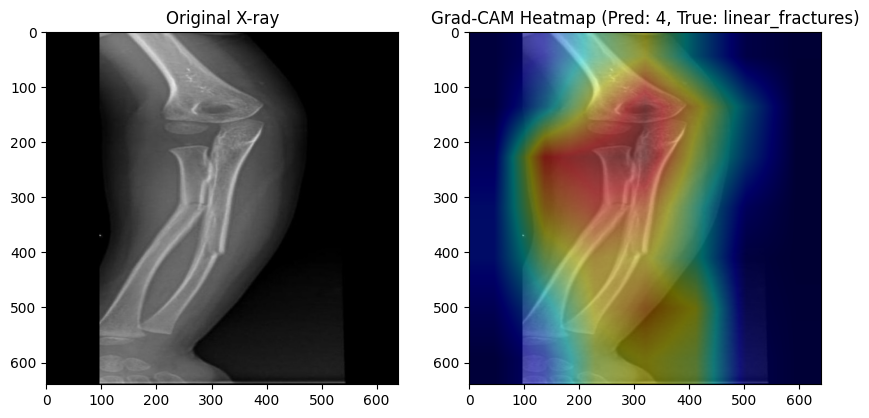

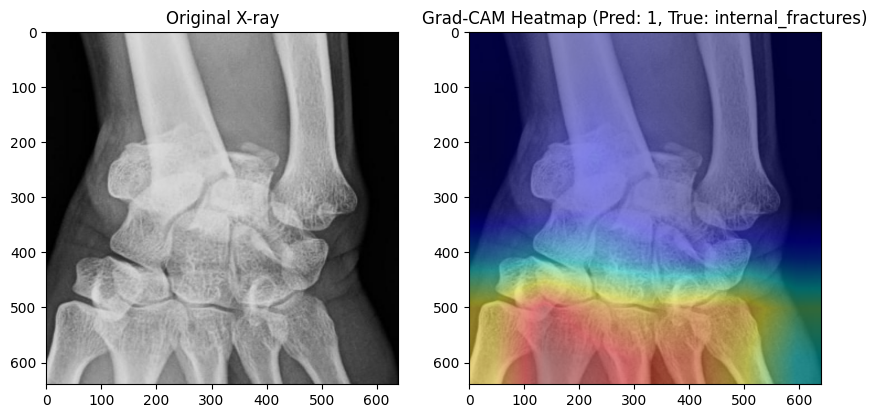

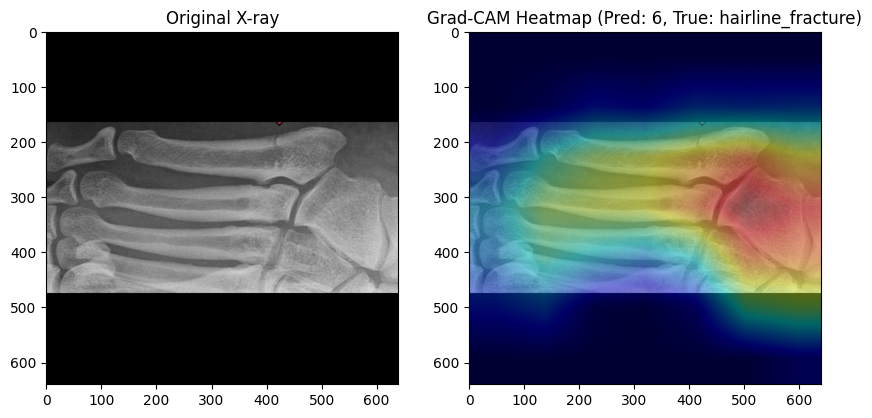

In [91]:
### **Step 16: Generate Grad-CAM Heatmaps for Model Interpretation**
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torch.nn import functional as F

# ✅ Load Best Trained Model
model_path = "best_model_final_optimized.pth"  # Load the best model checkpoint

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.fc.in_features, 7)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ✅ Define Preprocessing Function
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    return image

# ✅ Apply Grad-CAM
def apply_gradcam(model, img_tensor, target_layer):
    feature_maps = None
    gradients = None

    def forward_hook(module, input, output):
        nonlocal feature_maps
        feature_maps = output

    def backward_hook(module, grad_in, grad_out):
        nonlocal gradients
        gradients = grad_out[0]

    target_layer.register_forward_hook(forward_hook)
    target_layer.register_backward_hook(backward_hook)

    output = model(img_tensor)
    pred_class = output.argmax().item()
    output[:, pred_class].backward()

    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    for i in range(feature_maps.shape[1]):
        feature_maps[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(feature_maps, dim=1).squeeze().detach().cpu().numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap, pred_class

# ✅ Overlay Heatmap
def overlay_heatmap(img_path, heatmap, pred_class, true_label):
    image = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original X-ray")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title(f"Grad-CAM Heatmap (Pred: {pred_class}, True: {true_label})")
    plt.show()

# ✅ Run Grad-CAM on Sample Images
sample_images = [
    "/content/updated_dataset/test/linear_fractures/001_jumbo_jpeg.rf.ebf440662388fc36df361ce39890acb2.jpg",
    "/content/updated_dataset/test/internal_fractures/20980tn_jpg.rf.08df4572fdeb34428103e11296500c19.jpg",
    "/content/updated_dataset/test/hairline_fracture/640px-Cropped_version_of_Jonesfracture_jpg.r40958b7c85972169a63197313018.jpg"
]  # Update paths to actual images

target_layer = model.layer4[-1]  # Last convolutional layer in ResNet50

for img_path in sample_images:
    img_tensor = preprocess_image(img_path)
    heatmap, pred_class = apply_gradcam(model, img_tensor, target_layer)
    true_label = img_path.split("/")[-2]  # Extract true class from path
    overlay_heatmap(img_path, heatmap, pred_class, true_label)


In [87]:
!ls /content/updated_dataset/test/hairline_fracture

0-_jumbo_jpeg.rf.d39588df830d194c0cda3b800664160b.jpg
10195_2010_96_Fig2_HTML_jpg.rf.c12df3901db2a4b4e0952d10f5660ae0.jpg
10195_2010_9ig2_HTML_jpg.rf.c12df3901db2a4b4e0952d10f5660ae0.jpg
2995c0750ed98208c238f4b6a27ddd_jumbo_jpg.rf.f3c327c6d4893a32a5bdf9d01f425028.jpg
2995c0750ed98208c238f4b6ad_jumbo_jpg.rf.f3c327c6d4893a32a5bdf9d01f425028.jpg
2bc441c91f63a9588fab405fde2ae3_jumbo_jpeg.rf.9b7b45ce86f1197b06bbfbdd736b8b55.jpg
402_2018_3035_Fig3_HTML_jpg.rf.c9959ea361358cf5ac4cf68c9096236f.jpg
640px-Cropped_version_of_Jonesfracture_jpg.r40958b7c85972169a63197313018.jpg
640px-Cropped_version_of_Jonesfracture_jpg.rf.cbf840958b7c85972169a63197313018.jpg
7919tn_jpg.rf.43200f6cb2d72e3082805002b9f3a1f8.jpg


In [81]:
from google.colab import files
files.download("best_model_final_optimized.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>